# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Importamos librerías y datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
#Cargamos los 3 dataset:
data_train = pd.read_json("dataset_amazon/dataset_es_train.json", lines=True)
data_dev = pd.read_json("dataset_amazon/dataset_es_dev.json", lines=True)
data_test = pd.read_json("dataset_amazon/dataset_es_test.json", lines=True)

#### Revisamos que hayan cargado correctamente

In [3]:
#Revisamos que se haya cargado correctamente el dataset train:
data_train.head(3)

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   

                                        review_title language product_category  
0                                   television Nevir       es      electronics  
1          Dinero tirado a la basura con esta compra       es      electronics  
2  solo llega una unidad cuando te obligan a comp...       es        drugstore

In [4]:
#Vemos la estructura del dataset:
data_train.shape

(200000, 8)

In [5]:
#Revisamos que se haya cargado correctamente el dataset dev:
data_dev.head(3)

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   

                         review_title language product_category  
0                         Mala compra       es         wireless  
1                   No lo he recibido       es          apparel  
2  Que no aprieta bien en el manillar       es           sports

In [6]:
#Vemos la estructura del dataset:
data_dev.shape

(5000, 8)

In [7]:
#Revisamos que se haya cargado correctamente el dataset test:
data_test.head(3)

review_id          product_id          reviewer_id  stars  \
0  es_0038754  product_es_0113523  reviewer_es_0580071      1   
1  es_0748979  product_es_0017036  reviewer_es_0819733      1   
2  es_0411746  product_es_0138642  reviewer_es_0508607      1   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1              la mensajería horrible, no compro mas   
2  Estoy muy decepcionado con el vendedor ya que ...   

                               review_title language product_category  
0                               no me llego       es         wireless  
1  amazon sigue sin cumplir en las entregas       es             home  
2                        ESTAFA EN EL ENVÍO       es              toy

In [8]:
#Vemos la estructura del dataset:
data_test.shape

(5000, 8)

Podemos ver que los 3 datasets tienen la misma estructura, por lo que podemos concatenarlos para hacer el análisis de datos y separarlos cuando hagamos los modelos de Machine Learning.

In [9]:
data = pd.concat([data_train, data_dev, data_test])

In [10]:
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language product_category  
0                                   television Nevir       es      electronics  
1          Dinero tirado a la basura con esta compra       es      electronics  
2  solo llega una unidad cuando te obligan a comp...       es        drugstore  
3                              PRODUCTO NO RECIBIDO.       es         wireless  
4                                           Devuelto       es            shoes

In [11]:
#Vemos la estructura del dataset:
data.shape

(210000, 8)

In [12]:
#Para ver la información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


<AxesSubplot:>

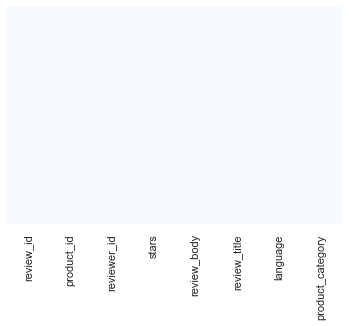

In [13]:
#Hacemos un gráfico para revisar si tiene valores faltantes:
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap= "Blues")

Vemos que no hay valores faltantes en el dataset.

Vamos revisando diferentes puntos del dataset

In [14]:
#para visualizar los datos de la columna stars:
stars_col = data.groupby("stars", sort= False, as_index=False).size().sort_values(by="size", ascending= False)
stars_col

stars   size
0      1  42000
1      2  42000
2      3  42000
3      4  42000
4      5  42000

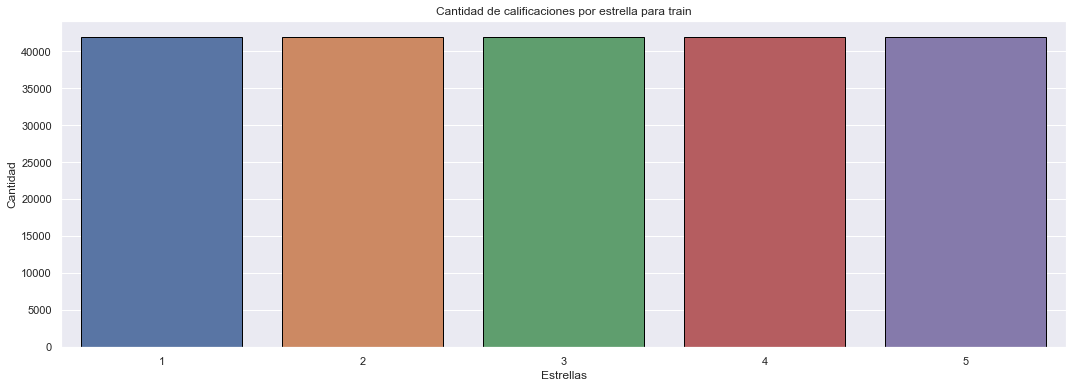

In [15]:
#Graficamos
plt.figure(figsize=(18,6))

sns.barplot(data = stars_col, x="stars", y= "size", lw=1, edgecolor="black")

plt.xlabel("Estrellas")
plt.ylabel("Cantidad")
plt.title("Cantidad de calificaciones por estrella para train")
plt.show()

Podemos ver que es un dataset balanceado: Hay la misma cantidad de features con cada cantidad de estrellas.

Para ver los datos únicos de las columnas: 

In [16]:
data["language"].unique()

array(['es'], dtype=object)

Vemos que todas las reseñas contenidas en el dataset están en idioma español.

In [17]:
data["product_category"].unique()

array(['electronics', 'drugstore', 'wireless', 'shoes', 'home', 'luggage',
       'office_product', 'kitchen', 'pc', 'toy', 'industrial_supplies',
       'furniture', 'pet_products', 'sports', 'home_improvement',
       'grocery', 'lawn_and_garden', 'beauty', 'other', 'watch',
       'automotive', 'book', 'apparel', 'video_games', 'camera',
       'baby_product', 'personal_care_appliances', 'jewelry',
       'digital_ebook_purchase', 'musical_instruments'], dtype=object)

## Análisis Exploratorio de Datos  (EDA)

Vamos a hacer el análisis exploratorio de datos, basándonos en el dataset de train para ver qué podemos descubrir que sirva a la compañía acerca de los productos y que resuelva algunas preguntas.

### ¿Cuál es la categoría de productos más vendido?

In [18]:
product_category_col = data.groupby("product_category", sort=False, as_index=False).size().sort_values(by="size",ascending=False)
product_category_col

product_category   size
4                       home  28328
2                   wireless  27208
9                        toy  14328
13                    sports  13856
8                         pc  11720
14          home_improvement  11468
0                electronics  10899
17                    beauty   7707
20                automotive   7495
7                    kitchen   7028
22                   apparel   6014
1                  drugstore   5778
21                      book   5528
11                 furniture   5481
25              baby_product   5098
6             office_product   5010
16           lawn_and_garden   4449
18                     other   4131
12              pet_products   3899
26  personal_care_appliances   3735
5                    luggage   3509
24                    camera   3180
3                      shoes   2886
28    digital_ebook_purchase   1936
23               video_games   1818
27                   jewelry   1677
29       musical_instruments   1608
19                     watch   1567
10       industrial_supplies   1552
15                   grocery   1107

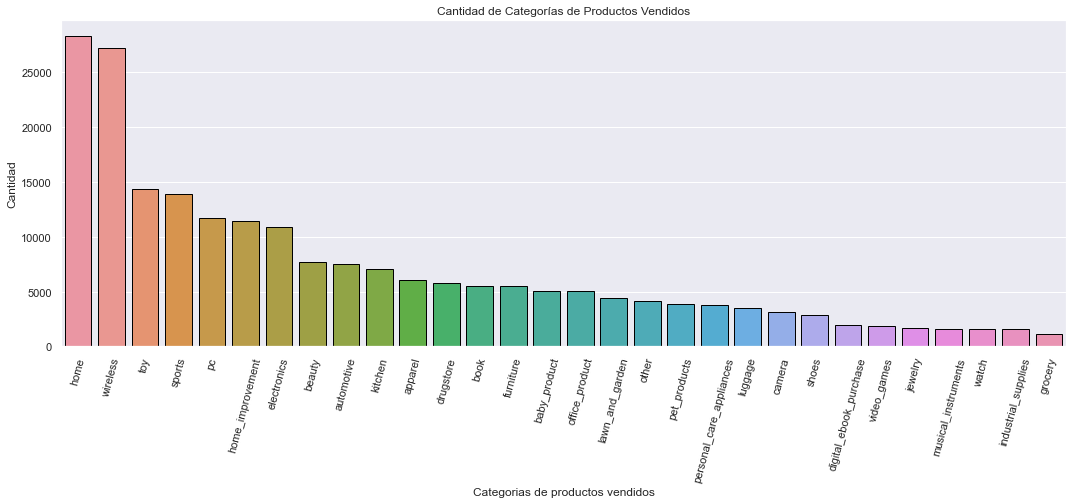

In [19]:
#Graficamos
plt.figure(figsize=(18,6))

sns.barplot(data = product_category_col, x="product_category", y= "size", lw=1, edgecolor="black")

plt.xlabel("Categorias de productos vendidos")
plt.xticks(rotation=75)
plt.ylabel("Cantidad")
plt.title("Cantidad de Categorías de Productos Vendidos")
plt.show()

Vamos que las 5 categorías de productos **más vendidos** son: home, wireless, toy, sports, pc, home_improvement.

Mientras que las **5 menos vendidas** son: grocery, industrial supplies, watch, musical instruments y jewerly.

### ¿Cómo están distribuidas las estrellas para cada categoría de productos?

In [20]:
stars_per_cat= data.groupby(["product_category", "stars"]).count()
stars_per_cat

review_id  product_id  reviewer_id  review_body  \
product_category stars                                                    
apparel          1           1324        1324         1324         1324   
                 2           1271        1271         1271         1271   
                 3           1263        1263         1263         1263   
                 4           1177        1177         1177         1177   
                 5            979         979          979          979   
...                           ...         ...          ...          ...   
wireless         1           6605        6605         6605         6605   
                 2           5972        5972         5972         5972   
                 3           5046        5046         5046         5046   
                 4           4844        4844         4844         4844   
                 5           4741        4741         4741         4741   

                        review_title  language  
product_category stars                          
apparel          1              1324      1324  
                 2              1271      1271  
                 3              1263      1263  
                 4              1177      1177  
                 5               979       979  
...                              ...       ...  
wireless         1              6605      6605  
                 2              5972      5972  
                 3              5046      5046  
                 4              4844      4844  
                 5              4741      4741  

[150 rows x 6 columns]

Utilizamos gráficos para verlo de forma visual:

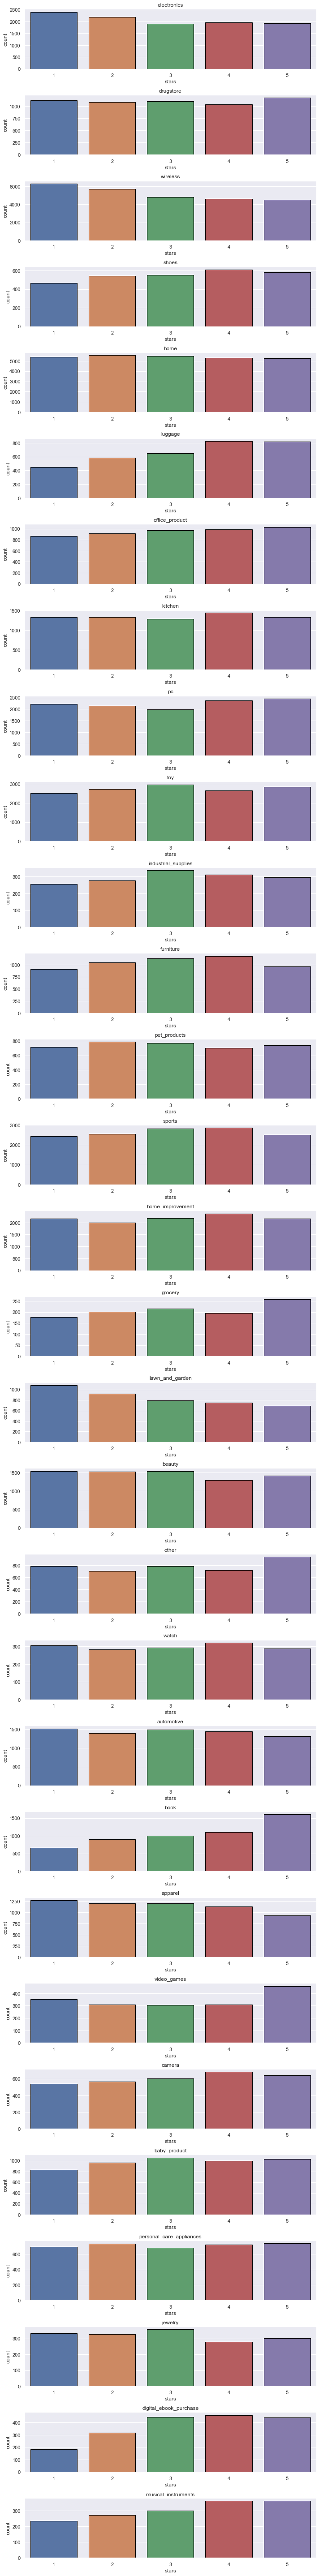

In [21]:
#Vamos a hacer gráficos las calificaciones (stars) según el tipo de categoría de producto (product_category)
#Hacemos un bucle para graficar cada producto

n= len(product_category_col)
product_category_rows = data_train["product_category"].unique()

plt.figure(figsize =(10,80))
for i in range(n):
    plt.subplot(n,1,i+1)
    sns.countplot(data= data_train[data_train.product_category == product_category_rows[i]], x="stars", lw=1, edgecolor="black")
    plt.title(product_category_rows[i])
    
plt.tight_layout()

Por lo miso que el dataset está muy balanceado, se puede ver en los gráficos las categorias de producto están "muy parejos" en cuestión de estrellas.

### ¿Cuál es el promedio de estrellas por categoría de productos? y ¿cuáles son los 3 mejores y peores calificados?


In [22]:
stars_mean= data.groupby("product_category", sort=False, as_index=False).mean().sort_values(by="stars", ascending=False)
stars_mean

product_category     stars
21                      book  3.404848
28    digital_ebook_purchase  3.361054
5                    luggage  3.293531
29       musical_instruments  3.211443
15                   grocery  3.159892
23               video_games  3.117712
24                    camera  3.101572
3                      shoes  3.100485
25              baby_product  3.088466
6             office_product  3.086228
18                     other  3.082305
10       industrial_supplies  3.070232
8                         pc  3.067065
11                 furniture  3.055099
9                        toy  3.039015
14          home_improvement  3.033310
13                    sports  3.029879
26  personal_care_appliances  3.024632
7                    kitchen  3.014371
1                  drugstore  3.004673
12              pet_products  2.996409
19                     watch  2.994895
4                       home  2.982526
20                automotive  2.955704
17                    beauty  2.940574
27                   jewelry  2.929636
0                electronics  2.891091
22                   apparel  2.869638
2                   wireless  2.821523
16           lawn_and_garden  2.763093

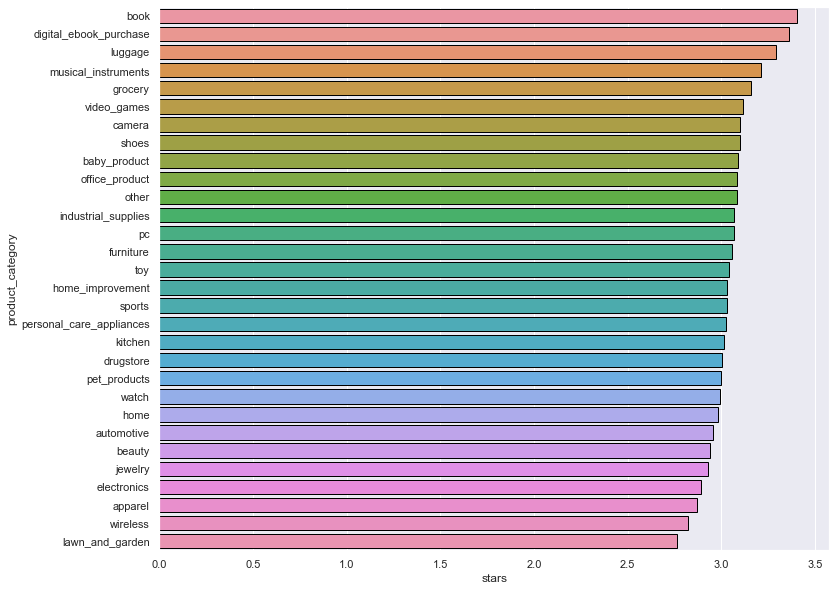

In [23]:
plt.figure(figsize=(12, 10))
sns.barplot(data= stars_mean, x= "stars", y="product_category", edgecolor="black" )
#plt.xticks(rotation=75)
plt.show()

Efectivamente podemos ver que la mayoría de las categorias de producto están alrededor de entre 2.5 y 3.5 estrellas.

Las **3 categorías con mejor promedio** son: book, digital ebook purchase, luggage.

Mientras que las **3 categorías con el promedio más bajo** son: lawn and garden, wireless y apparel.

## Vamos a empezar a analizar las reseñas:

### 1. ¿Qué tan largos son los títulos de las reseñas y qué relación hay con las estrellas que pone el cliente?

In [24]:
data["review_title_len"]= data["review_title"].apply(len)
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language  \
0                                   television Nevir       es   
1          Dinero tirado a la basura con esta compra       es   
2  solo llega una unidad cuando te obligan a comp...       es   
3                              PRODUCTO NO RECIBIDO.       es   
4                                           Devuelto       es   

  product_category  review_title_len  
0      electronics                16  
1      electronics                41  
2        drugstore                53  
3         wireless                21  
4            shoes                 8

Para ver la distribución que tienen los títulos de las reseñas:

<AxesSubplot:>

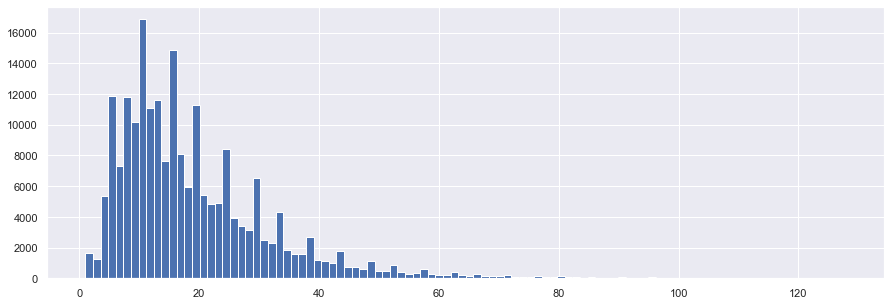

In [25]:
data["review_title_len"].hist(bins=100, figsize=(15,5))

In [26]:
data["review_title_len"].describe()

count    210000.000000
mean         19.169671
std          13.429118
min           1.000000
25%          10.000000
50%          16.000000
75%          25.000000
max         128.000000
Name: review_title_len, dtype: float64

Podemos ver que: 
- los títulos van desde 1 hasta 128 caracterres.
- la media de los títulos es de 19 caracteres.
- por debajo del 75% de los titulos tienen 25 carcateres o menos (Sólo el 25% de los titulos tienen más de 25 caractaeres).
- Menos del 25% tienen máximo 10 caracteres
- Menos del 50% tienen máximo 16 caracteres (no hay mjucha diferencia entre el 25% y el 50%).

También en el histograma podemos ver cómo se distribuye la frecuencia de caracteres.

Para ver el promedio de caraceteres con respecto a las estrellas:

In [27]:
stars_mean2= data.groupby(["stars"]).mean()

stars_mean2

review_title_len
stars                  
1             19.651190
2             20.730214
3             19.637905
4             18.313000
5             17.516048

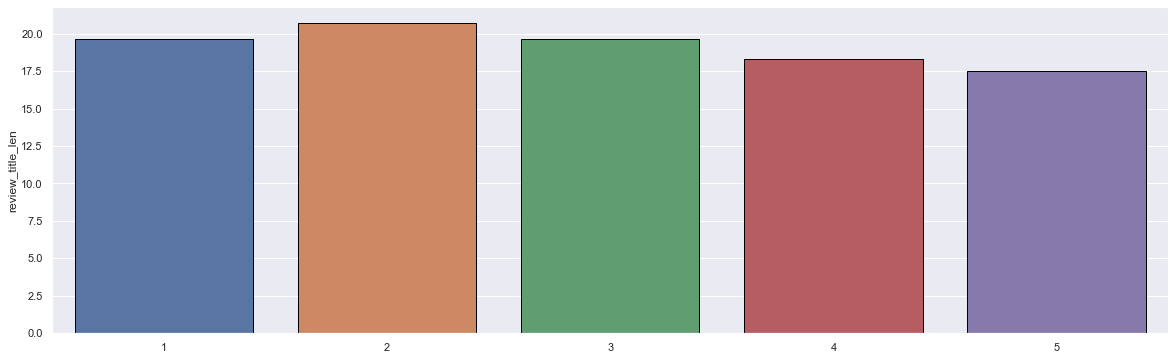

In [28]:
plt.figure(figsize=(20, 6))
sns.barplot(data= stars_mean2, x= [1,2,3,4,5], y= "review_title_len", edgecolor="black" )

plt.show()

La única diferencia que podemos ver es que entre mayor es el puntaje en estrellas que le da el cliente, usa menos palabras en el título de la reseña (aunque no es mucha la diferencia, y también lo vimos están alrededor del promedio general).

In [29]:
#Para ver la primer reseña mas corta:
data[data["review_title_len"]==1]["review_title"].iloc[0]

'😬'

In [30]:
#Para ver la primer reseña más larga:
data[data["review_title_len"]==128]["review_title"].iloc[0]

'Tiene una goma que no hace su funcion de antideslizante, es muy dura. Yo tengo otros del mismo tipo y son de goma antideslizante'

### ¿Cuáles son las palabras que más utilizan en los títulos de las reseñas?

Vamos a quitar las stopwords, para quedarnos con las palabras principales de los títulos de las reseñas.

In [31]:
#Importamos librerias:
import nltk
nltk.download('stopwords')

#importamos librería para hacer nube de palabras:
from wordcloud import WordCloud

#Importamos librería para reemplazar caracteres:
import re

#Importamos Lemmatizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fcpazg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet` que se encuentra en la solapa 'corpora' y las librerias 'maxent_treebank_pos_' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [32]:
#nltk.download()

In [33]:
#Importamos las stopwords:
stopwords = nltk.corpus.stopwords.words("spanish")
set(stopwords)

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Hacemos una nube de palabras para ver qué palabras utilizan los títulos de las reseñas (general):

In [34]:
def word_cloud (data):
    
    """
    Función para hacer nubes de palabras con WorldCloud
    
    Arguments:
    - Columna de dataset
    
    Output:
    - Nube de palabras
    - Las 15 palabras que más aparecen en el texto 
    """
    
    #Importamos librerias:
    import nltk
    from wordcloud import WordCloud   #para hacer nube de palabras
    import re                         #para reemplazar caracteres
    stopwords = nltk.corpus.stopwords.words("spanish")
 
    
    texto= data.tolist()
    
    #Reemplzar los caracteres que no sean letras por espacios:
    texto= re.sub("[^a-zA-ZáéíóúüÁÉÍÓÚÜñÑ]"," ",str(texto))
    

    #Pasar todo a minúsculas
    texto= texto.lower()

    #Tokenizar para separar las palabras del texto
    texto= nltk.word_tokenize(texto)
    
    #Sacar las Stopwords
    texto = [palabra for palabra in texto if not palabra in stopwords]
    texto2 = texto.copy()

    #Unimos el texto
    texto = " ".join(texto)
    
    #Para ver las palabras con más frecuencia:
    freq = nltk.FreqDist(texto2)
    df = pd.DataFrame(freq.items(), columns = ["Palabra", "Frecuencia"])
    df.sort_values("Frecuencia", ascending=False, inplace=True)
    df.reset_index(drop = True, inplace=True)
        
    #Hacemnos la nube:
    ax= plt.figure(figsize=(20,20))
    plt.imshow(WordCloud().generate(str(texto)))
    plt.grid(None)
    

    return ax, df.head(15)

(<Figure size 1440x1440 with 1 Axes>,
      Palabra  Frecuencia
 0    calidad       16419
 1       bien       12503
 2      buena       10481
 3     precio        9043
 4       buen        7993
 5   producto        7777
 6        mal        4620
 7   perfecto        4442
 8       mala        4218
 9   funciona        3667
 10    compra        3554
 11     bueno        3396
 12    cumple        3187
 13  correcto        2343
 14    bonito        2250)

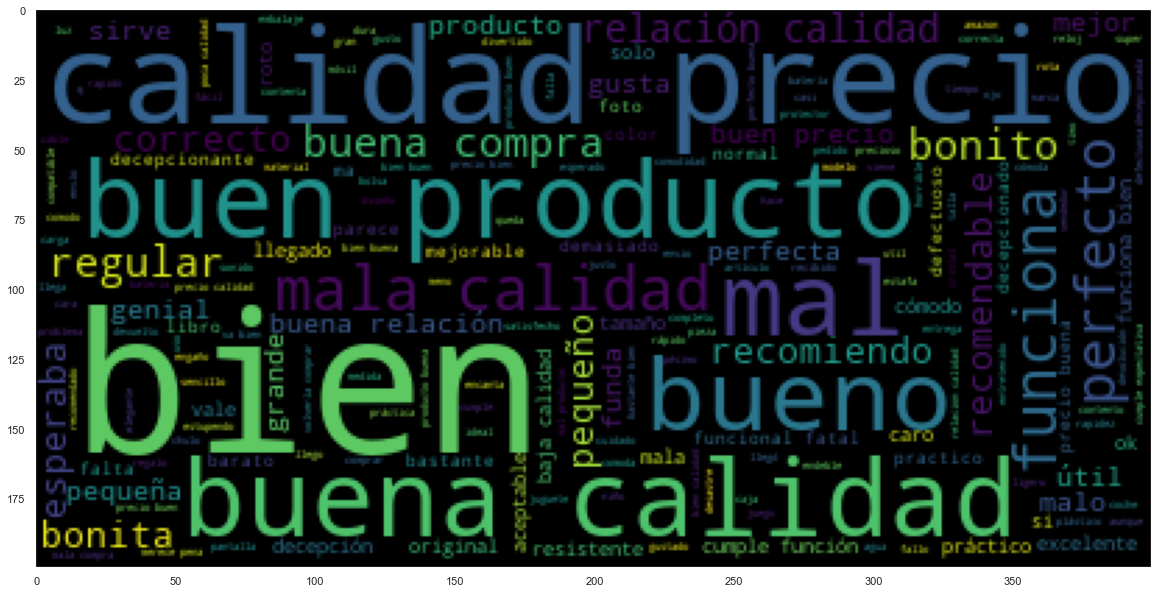

In [35]:
word_cloud(data.review_title)

Podemos ver que hay palabras que se pueden definir como buenas (en su mayoría) y como malas (menos que las buenas), por lo que vamos a hacer una separación por estrellas para ver qué palabras utilizan en los titulares quienes califican con:
- 1 estrella: Calificación negativa para el producto.
- 3 estrellas: Gusto medio, aunque podría clasificarse como negativo.
- 5 estrellas: Calificación positiva para el producto.

Veamos las palabras que más aparecen **para 5 estrellas:**

(<Figure size 1440x1440 with 1 Axes>,
          Palabra  Frecuencia
 0        calidad        4068
 1          buena        3858
 2       perfecto        3022
 3           buen        2883
 4         precio        2509
 5           bien        2063
 6       producto        1938
 7         compra        1448
 8         genial        1337
 9      excelente        1136
 10         bueno         972
 11  recomendable         900
 12      perfecta         726
 13        bonito         604
 14        cumple         589)

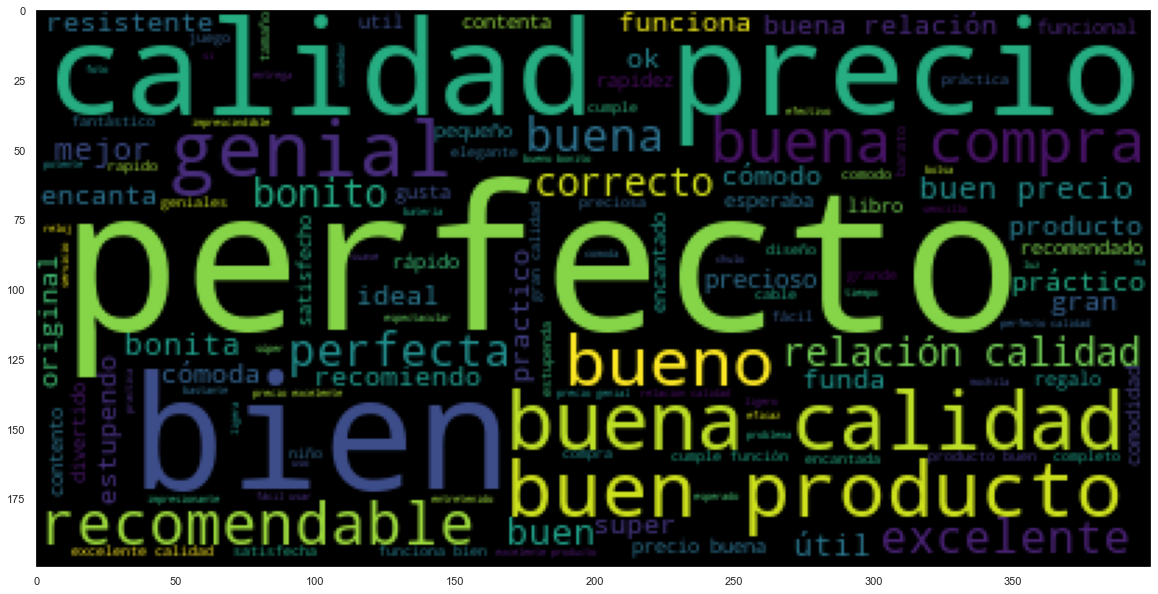

In [36]:
word_cloud(data[data["stars"]==5].review_title)

Podemos que sobresalen las palabras calidad, buena, perfecto, buen, precio, bien. Vemos que las palabras están alrededor del concepto de buen producto.

**Para 3 estrellas:**

(<Figure size 1440x1440 with 1 Axes>,
      Palabra  Frecuencia
 0       bien        3891
 1    calidad        2663
 2     precio        1996
 3      buena        1525
 4       buen        1278
 5        mal        1205
 6   producto        1051
 7    regular        1037
 8     cumple         821
 9      bueno         787
 10  correcto         718
 11  esperaba         624
 12  funciona         578
 13   pequeño         567
 14    bonito         557)

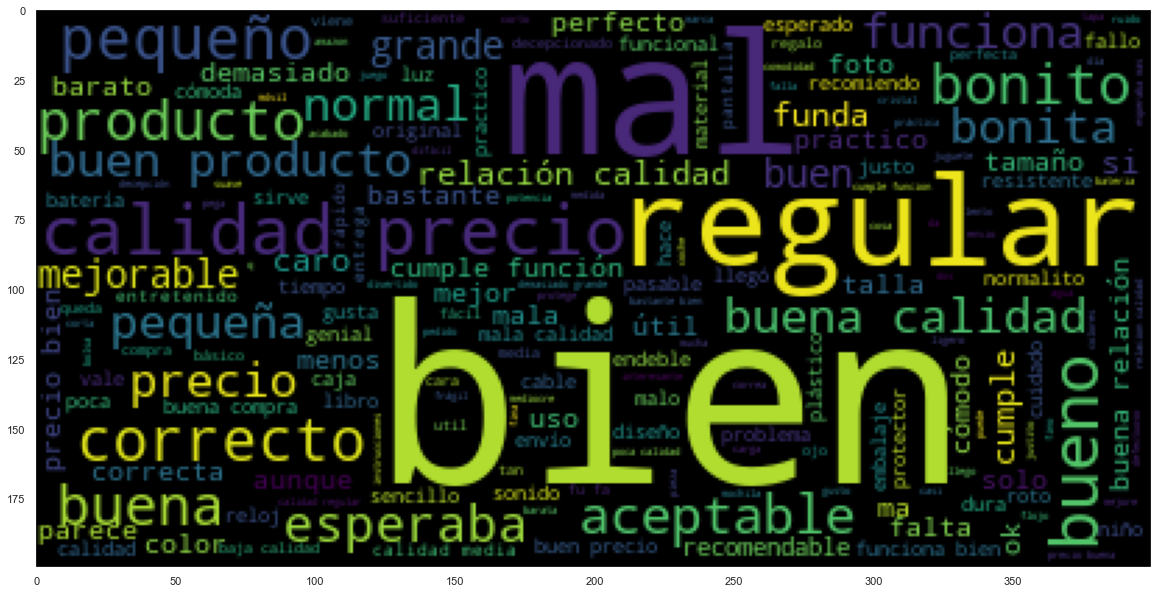

In [37]:
word_cloud(data[data["stars"]==3].review_title)

Las palabras que sobresalen son: bien, calidad, precio, buena, buen, mal, producto, regular, cumple, bueno. Por lo que nos podemos dar cuenta que a quien califica con 3 estrellas considera, de alguna forma, no bueno el producto.

Veamos **para 1 estrella:**

(<Figure size 1440x1440 with 1 Axes>,
        Palabra  Frecuencia
 0      calidad        2538
 1         mala        2316
 2     producto        1906
 3          mal        1784
 4     funciona        1313
 5         malo         885
 6      llegado         859
 7   recomiendo         738
 8     recibido         705
 9        nunca         647
 10        bien         635
 11       llegó         634
 12        roto         573
 13       fatal         573
 14      estafa         543)

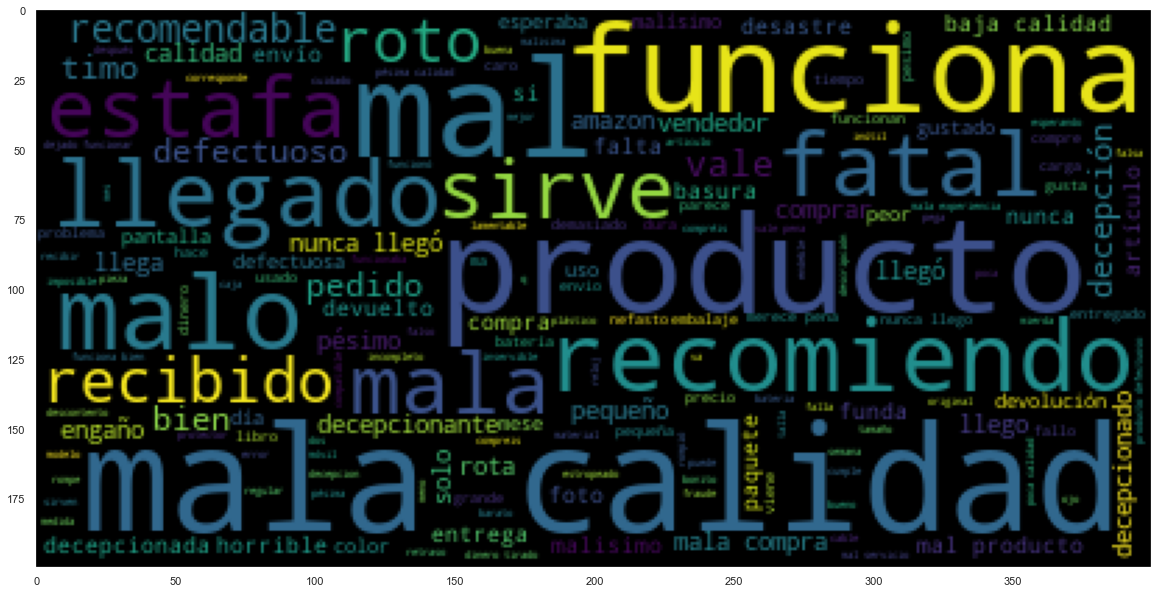

In [38]:
word_cloud(data[data["stars"]==1].review_title)

Vemos que sobresalen las palabras:
- Tiene que ver con la calidad del produto: calidad, mala, producto, funciona, 
- Entrega: llegado, recibido, nunca, llegó.
- Emocional: Fatal, estafa.

## Analisis de los cuerpos de las reseñas


### ¿Qué tan largas son las reseñas según la cantidad de estrellas con que califican el producto?

Ahora vamos a hacer el mismo análisis para los cuerpos de las reseñas :

In [39]:
data["review_body_len"]= data["review_body"].apply(len)
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language  \
0                                   television Nevir       es   
1          Dinero tirado a la basura con esta compra       es   
2  solo llega una unidad cuando te obligan a comp...       es   
3                              PRODUCTO NO RECIBIDO.       es   
4                                           Devuelto       es   

  product_category  review_title_len  review_body_len  
0      electronics                16               94  
1      electronics                41              140  
2        drugstore                53              117  
3         wireless                21              332  
4            shoes                 8               36

<AxesSubplot:>

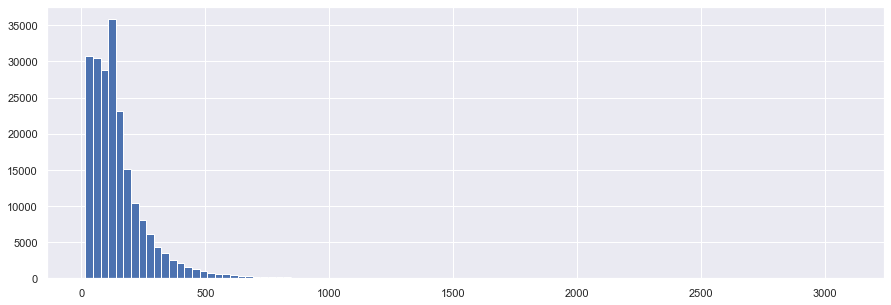

In [40]:
data["review_body_len"].hist(bins=100, figsize=(15,5))

In [41]:
data["review_body_len"].describe()

count    210000.000000
mean        151.292000
std         132.099481
min          16.000000
25%          68.000000
50%         120.000000
75%         186.000000
max        3086.000000
Name: review_body_len, dtype: float64

Podemos ver que: 
- las reseñas van desde 16 caracteres hasta 3,086 caracterres.
- la media de las reseñas es de 151 caracteres.
- por debajo del 75% de las reseñas tienen 186 carcateres o menos (Sólo el 25% de las reseñas tienen más de 186 caractaeres y hasta 3,086).

También en el histograma podemos ver cómo se distribuye la frecuencia de caracteres.

Para ver el promedio de caraceteres con respecto a las estrellas:

In [42]:
data.groupby(["stars"]).mean()

review_title_len  review_body_len
stars                                   
1             19.651190       152.947762
2             20.730214       168.251524
3             19.637905       155.310333
4             18.313000       142.507452
5             17.516048       137.442929

Podemos ver que cuando la persona califica el producto con menos estrellas escribe más caracteres en la reseña que quienes lo califican positivamente.

In [43]:
#Para ver la reseña mas corta:
data[data["review_body_len"]==16]["review_body"].iloc[0]

'No Me ha llegado'

In [44]:
data[data["review_body_len"]==16].iloc[0]

review_id                        es_0547433
product_id               product_es_0853179
reviewer_id             reviewer_es_0315116
stars                                     1
review_body                No Me ha llegado
review_title        cuando llege ya opinare
language                                 es
product_category                   wireless
review_title_len                         23
review_body_len                          16
Name: 39219, dtype: object

In [45]:
#Para ver la reseña mas larga:
data[data["review_body_len"]==3086]["review_body"].iloc[0]

'Hago estos cambios en mi opinión, no por el producto, si no por el vendedor. Me puse en contacto con el vendedor para que me diera una solución sobre el problema de conectar los discos a través de un HUB. Me dijo que tenia que funcionar, y que si no me enviaría otro sin costo. Seguí sus instrucciones y como no funcionaron, me pidieron que enviara el aparato a una dirección internacional asumiendo yo el coste (y fuera de la mediación de Amazon), Cuando le pregunte por esos costes (que son superiores al precio del articulo), me indicaron que los pagara, que luego ya me los devolverían. y que luego también me enviarían uno nuevo. Me ha parecido todo muy informal y poco ético. Me encanta el producto, pero voy a devolverlo y buscar otro. Vamos a despiezar mi análisis: Presentación de la caja: Como la mayoría, pero hasta diría que un poco mejor. Mas protegido. Un manual que, aun tirando de traductor y con una impresión un poco justa, es un verdadero manual de instrucciones. Un librillo en v

In [46]:
data[data["review_body_len"]==3086].iloc[0]

review_id                                                  es_0510677
product_id                                         product_es_0589578
reviewer_id                                       reviewer_es_0596584
stars                                                               5
review_body         Hago estos cambios en mi opinión, no por el pr...
review_title        El mejor que he tenido, y he tenido muchos... ...
language                                                           es
product_category                                                other
review_title_len                                                   74
review_body_len                                                  3086
Name: 192038, dtype: object

Podemos ver que la persona que escribió esta reseña tuvo una mala experiencia de primnera mano y después le repusieron el producto.

### ¿Cuáles son las palabras que más utilizan las reseñas?

**Generales:**

(<Figure size 1440x1440 with 1 Axes>,
        Palabra  Frecuencia
 0         bien       54174
 1      calidad       33528
 2           si       26432
 3     producto       25869
 4       precio       24156
 5        buena       20402
 6     bastante       13591
 7          dos       11840
 8         buen       11739
 9     funciona       11597
 10         mas       10631
 11        hace       10582
 12      aunque        9906
 13  recomiendo        9758
 14         uso        9729)

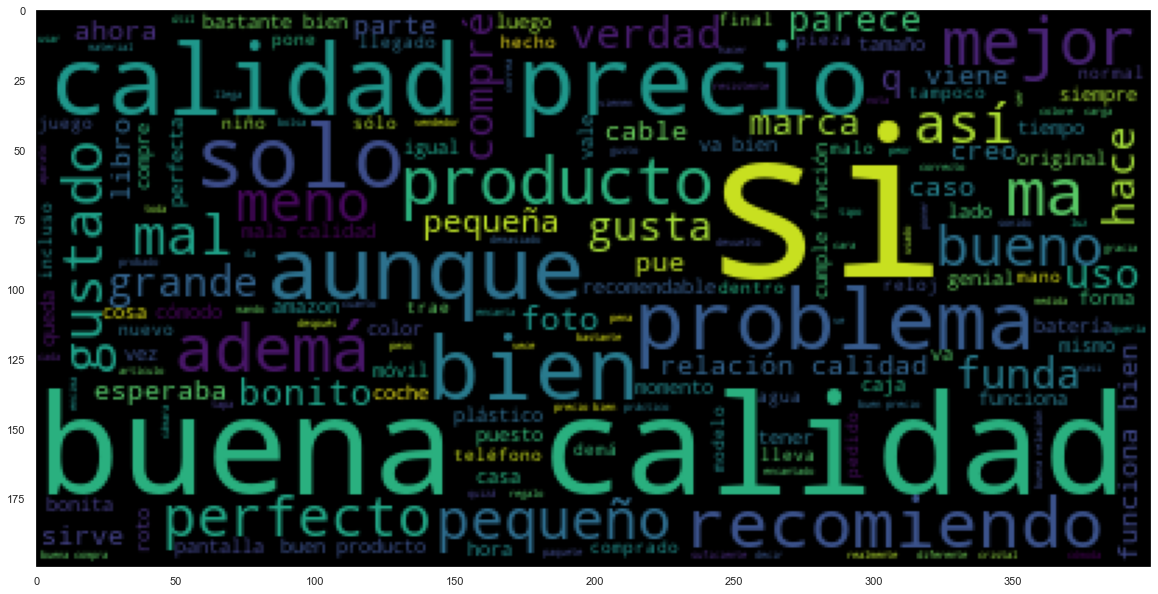

In [47]:
word_cloud(data.review_body)

Podemos ver que el general resaltan: bien, calidads, si, producto, precio, buena, bastante.

Vamos a ver para las diferentes calificaciones:

**Para 5 estrellas:**

(<Figure size 1440x1440 with 1 Axes>,
           Palabra  Frecuencia
 0            bien        9814
 1         calidad        8673
 2           buena        7198
 3          precio        6113
 4        perfecto        5031
 5        producto        4686
 6            buen        4347
 7          compra        2987
 8              si        2929
 9   perfectamente        2904
 10     recomiendo        2756
 11          fácil        2572
 12       bastante        2534
 13         genial        2447
 14       funciona        2194)

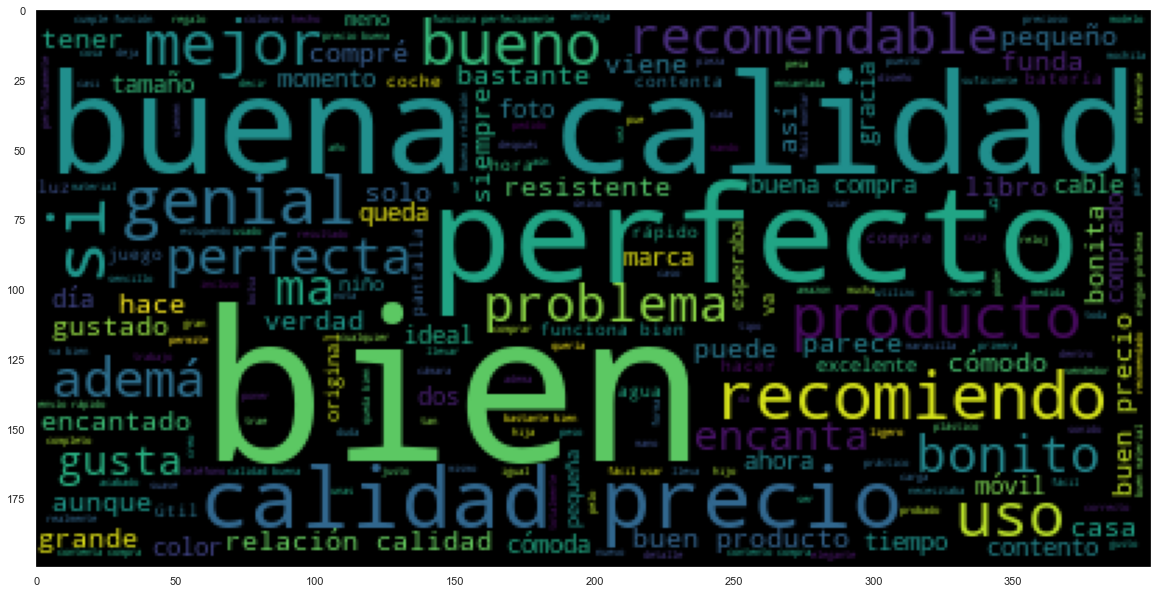

In [48]:
word_cloud(data[data["stars"]==5].review_body)

Podemos ver que resaltan palabras como: bien, calidad, buena, precio, perfecto, producto.

**Para 3 estrellas:**

(<Figure size 1440x1440 with 1 Axes>,
      Palabra  Frecuencia
 0       bien       14641
 1         si        6836
 2    calidad        6283
 3     precio        5667
 4   producto        4144
 5   bastante        3472
 6      buena        3374
 7     aunque        3030
 8        mas        2723
 9        mal        2362
 10    parece        2325
 11      hace        2251
 12  funciona        2111
 13     puede        2091
 14     queda        2091)

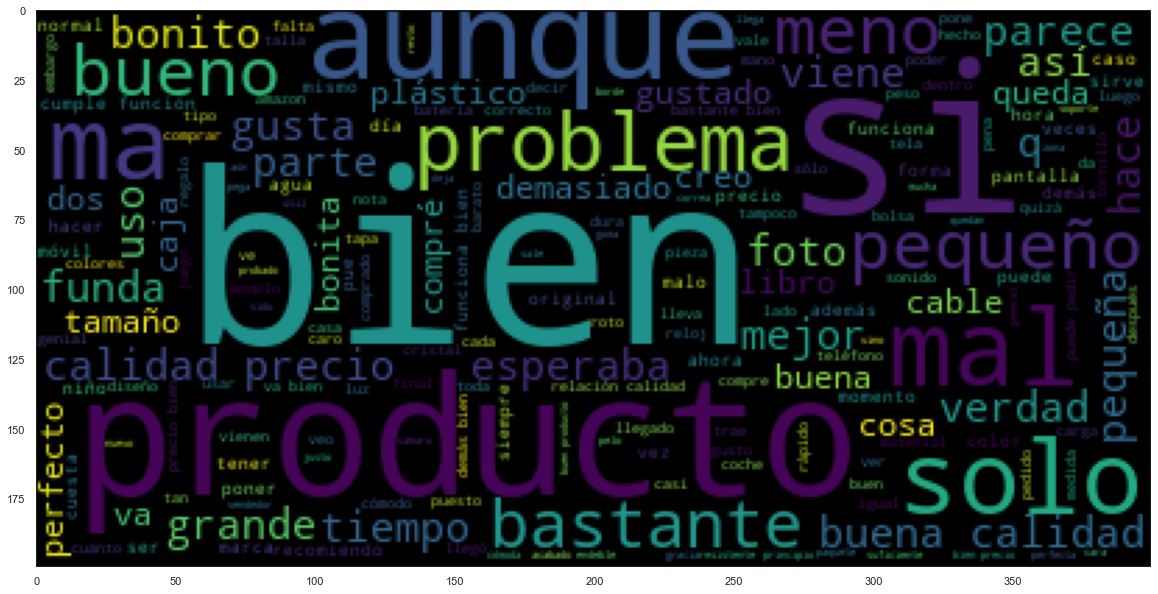

In [49]:
word_cloud(data[data["stars"]==3].review_body)

Las palabras (no stopwords) que resaltan son: bien, si, calidad, precio, producto, bastante.

**Para 1 estrella** 

(<Figure size 1440x1440 with 1 Axes>,
        Palabra  Frecuencia
 0     producto        7611
 1           si        4900
 2         bien        4668
 3      calidad        4539
 4      llegado        3560
 5          dos        3520
 6          mal        2987
 7   recomiendo        2973
 8       amazon        2895
 9         mala        2713
 10    funciona        2708
 11        solo        2665
 12      dinero        2662
 13    vendedor        2462
 14        hace        2318)

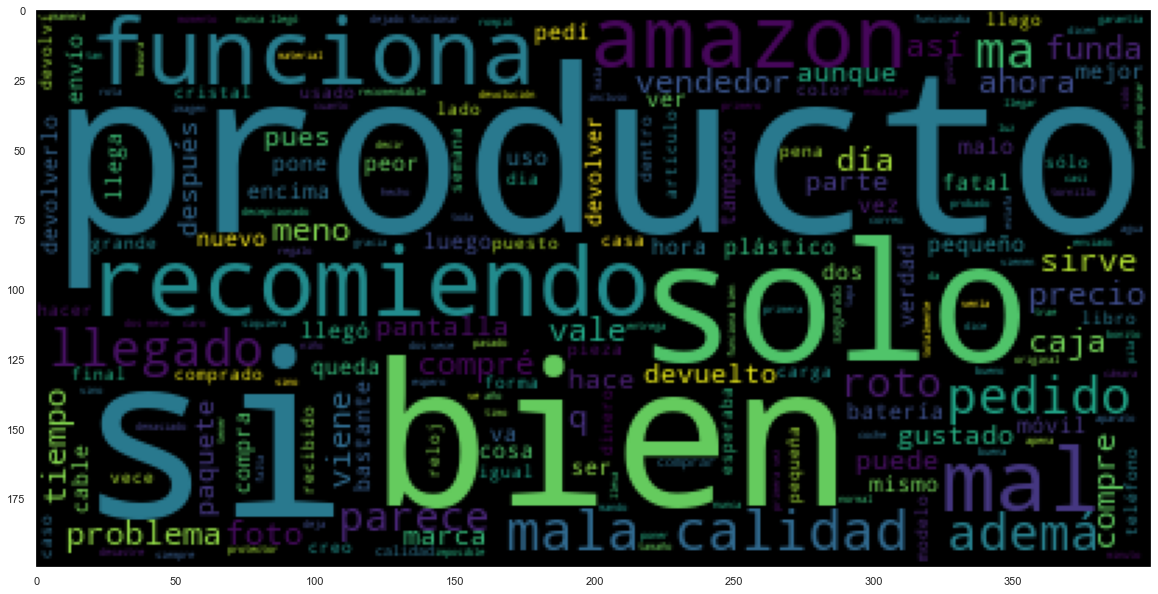

In [50]:
word_cloud(data[data["stars"]==1].review_body)

Podemos ver que, fuera de las stopwords, resaltan: producto, si bien, calidad, llegado, dos, mal, recomiendo.

**Conclusiones de palabras:** 
- Podemos ver que palabras como "producto", "calidad", "precio" aparecen en todas las categorías (por el concepto del dataset), por lo que no aportarían mucho al modelo.
- Palabras como bien, buena, mal, etc... también aparecen, PERO estas palabras podrían ayudar a definir si la reseña es positiva o negativa, por lo que se podrían quedar.
- Palabras como "si", "dos", "solo", tampoco aportan mucho, ya que son demasiado generales en el idioma, por lo que se pueden sacar.

## 1. Limpieza y preparación de datos

Hacemos un filtro para eliminar las palabras que encontramos que nio aportan mucho en significado o se pueden repetir

In [51]:
filtrar =[]
if True:
    filtrar.append("producto")
    filtrar.append("calidad")
    filtrar.append("precio")
    filtrar.append("si")
    filtrar.append("dos")
    filtrar.append("solo")

In [52]:
data.head()

review_id          product_id          reviewer_id  stars  \
0  es_0491108  product_es_0296024  reviewer_es_0999081      1   
1  es_0869872  product_es_0922286  reviewer_es_0216771      1   
2  es_0811721  product_es_0474543  reviewer_es_0929213      1   
3  es_0359921  product_es_0656090  reviewer_es_0224702      1   
4  es_0068940  product_es_0662544  reviewer_es_0224827      1   

                                         review_body  \
0  Nada bueno se me fue ka pantalla en menos de 8...   
1  Horrible, nos tuvimos que comprar otro porque ...   
2  Te obligan a comprar dos unidades y te llega s...   
3  No entro en descalificar al vendedor, solo pue...   
4               Llega tarde y co la talla equivocada   

                                        review_title language  \
0                                   television Nevir       es   
1          Dinero tirado a la basura con esta compra       es   
2  solo llega una unidad cuando te obligan a comp...       es   
3                              PRODUCTO NO RECIBIDO.       es   
4                                           Devuelto       es   

  product_category  review_title_len  review_body_len  
0      electronics                16               94  
1      electronics                41              140  
2        drugstore                53              117  
3         wireless                21              332  
4            shoes                 8               36

In [53]:
#Quitamos las columnas que no nos interesan para el análisis:
data= data.drop(["review_id", "product_id", "reviewer_id", "review_title", "language", "product_category", "review_title_len", "review_body_len"], axis=1)
data2= data

In [54]:
data.head()

stars                                        review_body
0      1  Nada bueno se me fue ka pantalla en menos de 8...
1      1  Horrible, nos tuvimos que comprar otro porque ...
2      1  Te obligan a comprar dos unidades y te llega s...
3      1  No entro en descalificar al vendedor, solo pue...
4      1               Llega tarde y co la talla equivocada

In [55]:
data.shape

(210000, 2)

In [56]:
#Traemos las stopwords:
stopwords= nltk.corpus.stopwords.words("spanish")
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [57]:
#Revisamos el resto de palabras que vamos a elminar de las reseñas:
filtrar

['producto', 'calidad', 'precio', 'si', 'dos', 'solo']

#### Limpieza de datos:

In [58]:
texto_list=[]
for texto in data.review_body:

    #Vamos a reemplzar los caracteres que no sean letras por espacios
    texto = re.sub("[^a-zA-ZáéíóúüÁÉÍÓÚÜñÑ]"," ",str(texto))

    #Pasamos todo a minúsculas
    texto = texto.lower()

    #Tokenizamos para separar las palabras
    texto = nltk.word_tokenize(texto)

    #Sacamos las Stopwords, palabras filtradas y palabras menores a 3 caracteres:
    texto = [palabra for palabra in texto if not palabra in stopwords]
    texto = [palabra for palabra in texto if palabra not in filtrar]
    texto = [palabra for palabra in texto if len(palabra) >3]

    #Por ultimo volvemos a unir el titular
    texto=" ".join(texto)

    texto_list.append(texto)
    

In [59]:
#Sustituimos la columna review_body por la columna limpia:
data["review_body"]= texto_list
data.head()

stars                                        review_body
0      1  bueno pantalla menos meses recibido respuesta ...
1      1  horrible comprar sabemos inglés informático de...
2      1  obligan comprar unidades llega forma reclamar ...
3      1  entro descalificar vendedor puedo decir tras m...
4      1                       llega tarde talla equivocada

In [60]:
#Hacemos lista de los reviews y de las estrellas:
review_body_list= list(data.review_body.values)
stars_list= list(data.stars.values)

In [61]:
#Importamos librerías para vectorizar:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
#Instanceamos el vectorizer
vectorizer = CountVectorizer(max_features= 1000)

In [63]:
matriz_review_body= vectorizer.fit_transform(review_body_list)

In [64]:
matriz_review_body.shape

(210000, 1000)

In [65]:
# Vizualizamos las 100 palabras mas usadas
print("100 primeras palabras mas usadas: ",vectorizer.get_feature_names()[0:100])

100 primeras palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'ademas', 'además', 'adhesivo', 'agarre', 'agradable', 'agua', 'aguanta', 'agujero', 'agujeros', 'ahora', 'aire', 'ajusta', 'ajustan', 'ajustar', 'ajuste', 'alguien', 'alguna', 'algún', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicación', 'apple', 'apretar', 'aquí', 'arriba', 'articulo', 'artículo', 'aspecto', 'atención', 'atrás', 'audio', 'aunque', 'auricular', 'auriculares', 'ayuda', 'azul', 'años', 'baja', 'bajo', 'barata', 'barato', 'baratos', 'base', 'bastante', 'bastantes', 'basura', 'bateria', 'batería', 'baterías', 'baño', 'bebé', 'bien', 'blanca', 'blanco', 'bluetooth', 'boca', 'bolsa', 'bolsas', 'bolsillo', 'bolso', 'bombillas', 'bonita', 'bonitas', 'bonito', 'bonitos',

In [66]:
#Para ver la matriz que formó con la vectorización:
print(matriz_review_body.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Ahora que ya vectorizamos podemos separar los datos de train y test. Para efectos de tomar datos aleatorios lo vamos a hacer aplicando el `train_test_split`

In [67]:
#Importamos librerias:
from sklearn.model_selection import train_test_split

In [68]:
#Definimos X, y
X= matriz_review_body
y= stars_list

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#Validamos que haya quedado bien hecha la participación 
print (X_train.shape, len(y_train))
print (X_test.shape, len(y_test))

(168000, 1000) 168000
(42000, 1000) 42000


## 2. Elección de métrica para la evaluación de los modelos:

Ya que tenemos un **modelo de Clasificación** las métricas que vamos a utilizar para elegir le mejor modelo serán:

**A. La Matriz de confusión:**

Una matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

Para este caso vamos a utilizar la matriz de confusión de forma visual.

Vamos a utilizar: **from sklearn.metrics import confusion_matrix**.

---

**B. La Exactitud (accuracy):**

La Exactitud  ( en inglés, “Accuracy”) se refiere a lo cerca que está el resultado de una medición del valor verdadero. Se representa como  la proporción de resultados verdaderos (tanto verdaderos positivos (TP) como verdaderos negativos (TN)) dividido entre el número total de casos examinados (verdaderos positivos, falsos positivos, verdaderos negativos, falsos negativos)

En forma práctica,  la Exactitud es  la cantidad de predicciones positivas que fueron correctas.

$$Accuracy = \frac{(TP+TN)}{(TP+FP+FN+TN})$$

---

**C. La Precisión (Precision):**

La Precisión (en inglés “Precision”)  Se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud. Cuanto menor es la dispersión mayor la precisión. Se representa por la proporción de verdaderos positivos dividido entre todos los resultados positivos (tanto verdaderos positivos, como falsos positivos).

En forma práctica es  el porcentaje de casos positivos detectados.

Se calcula como:  
$$Precision= \frac{TP}{(TP+FP)}$$

---

**D. La Sensibilidad (“Recall” o “Sensitivity” ):**
También se conoce como Tasa de Verdaderos Positivos (True Positive Rate) ó TP. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

Se puede decir que la sensibilidad es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos.

Se calcula como:

$$Recall = \frac{VP}{(VP+FN)}$$

---

**E. EL F 1 SCORE:**

El F1 score nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual.

Se calcula:  
$$F1 \ score = \frac{2*(Recall*Precision)}{(Recall+Precision)}$$

---

Tanto para el accuracy, precision, recall y F1 score vamos a utilizar: **from sklearn.metrics import classification_report**

**Criterio de utilización:** Vamos a elegir el modelo con el **mayor accuracy** y **F1 score**.

Bibliografía: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

In [71]:
#Importamos librerías para para las métricas:
from sklearn.metrics import confusion_matrix, classification_report

## 3. Modelo Benchmark 

Ya que tenemos un problema de clasificación, vamos a tomar un modelo sencillo para realizar el primer análisis.

Tomaremos un árbol de decisión con los parámetros por de fault.

In [72]:
#importamos librerías 
from sklearn.tree import DecisionTreeClassifier

In [73]:
#instanceamos:
tree = DecisionTreeClassifier(random_state=42)

In [74]:
#entrenamos el modelo:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
#Predecimos los valores para train:
y_train_pred_tree= tree.predict(X_train)

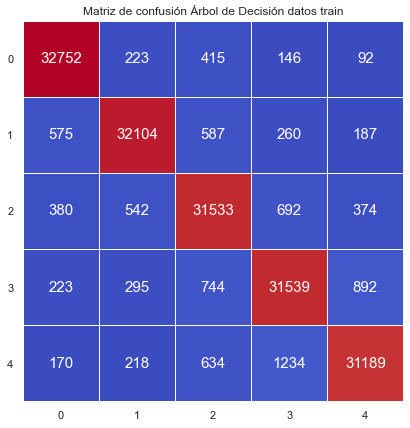

In [76]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_train, y_train_pred_tree), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Árbol de Decisión datos train")
plt.yticks(rotation=0)
plt.show()

In [77]:
print(classification_report(y_train, y_train_pred_tree))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97     33628
           2       0.96      0.95      0.96     33713
           3       0.93      0.94      0.94     33521
           4       0.93      0.94      0.93     33693
           5       0.95      0.93      0.94     33445

    accuracy                           0.95    168000
   macro avg       0.95      0.95      0.95    168000
weighted avg       0.95      0.95      0.95    168000



In [78]:
#Probamos con los datos de test
y_pred_test_tree= tree.predict(X_test)

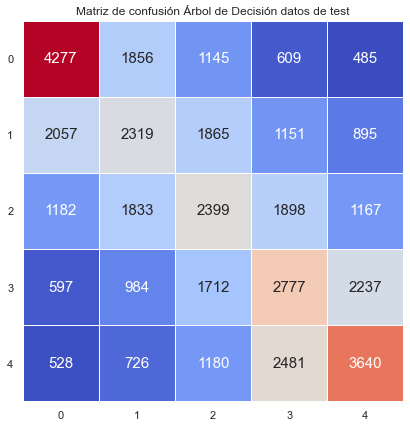

In [79]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test, y_pred_test_tree), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Árbol de Decisión datos de test")
plt.yticks(rotation=0)
plt.show()

In [80]:
print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      8372
           2       0.30      0.28      0.29      8287
           3       0.29      0.28      0.29      8479
           4       0.31      0.33      0.32      8307
           5       0.43      0.43      0.43      8555

    accuracy                           0.37     42000
   macro avg       0.37      0.37      0.37     42000
weighted avg       0.37      0.37      0.37     42000



Con este modelo de Árbol de Decisión podemos ver que para los datos de train predice muy bien(tiene un accuracy de 0.95), mientras que para los datos de dev tiene un accuracy demasiado bajo(0.37).

También podemos ver que las que mejor predice son para 1 estrella (F1-score de 0.50) y 5 estrellas (F1-score de 0.43).

Vamos a ver si puede mejorar con GridSearch y con otros modelos.

### Mejorando el  modelo:

Vamos a aplicar GridSearch para ver si se mejora el árbol de decisión anterior.

In [81]:
#importamos librerías:
from sklearn.model_selection import GridSearchCV

In [82]:
#Armamos la grilla para Grid Search:
param_grid_tree = {'criterion':["gini", "entropy"],
                  'max_depth': np.arange(5, 10),
                  'min_samples_split': [2,3,5],            
                  'min_samples_leaf':[1,2,3]} 

In [83]:
modelo = GridSearchCV(tree, param_grid=param_grid_tree, cv=5)

In [84]:
modelo.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5]})

In [85]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

Mejores parametros: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Mejor Score: 0.31384523809523807



In [86]:
#Hacemos el árbol con los mejores parámetros que mnos dió GridSearch y lo probamos:
tree2= DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=1, min_samples_split=3, random_state=42)

In [87]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=42)

In [88]:
#Vamos a predecir para test:
y_test_pred_tree2= tree2.predict(X_test)

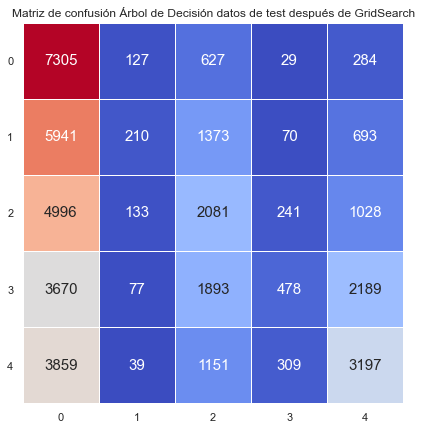

In [89]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test, y_test_pred_tree2), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Árbol de Decisión datos de test después de GridSearch")
plt.yticks(rotation=0)
plt.show()

In [90]:
print(classification_report(y_test, y_test_pred_tree2))

              precision    recall  f1-score   support

           1       0.28      0.87      0.43      8372
           2       0.36      0.03      0.05      8287
           3       0.29      0.25      0.27      8479
           4       0.42      0.06      0.10      8307
           5       0.43      0.37      0.40      8555

    accuracy                           0.32     42000
   macro avg       0.36      0.31      0.25     42000
weighted avg       0.36      0.32      0.25     42000



Podemos ver que este modelo da un accuracy y F1 más bajo que el árbol de benchmark para los datos de dev, por lo que no mejoramos el score y vamos a probar otro modelo.


### Modelo con Naïve Bayes:

Vamos a probar con Naïves Bayes

In [91]:
#Importamos librerías:
from sklearn.naive_bayes import GaussianNB

In [92]:
#Instanciamos:
nb= GaussianNB()

In [93]:
nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [94]:
#Predecimos con train:
y_pred_train_nb= nb.predict(X_train.toarray())

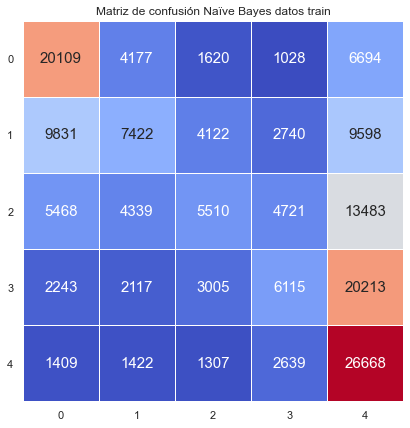

In [95]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_train, y_pred_train_nb), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Naïve Bayes datos train")
plt.yticks(rotation=0)
plt.show()

In [96]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

           1       0.51      0.60      0.55     33628
           2       0.38      0.22      0.28     33713
           3       0.35      0.16      0.22     33521
           4       0.35      0.18      0.24     33693
           5       0.35      0.80      0.48     33445

    accuracy                           0.39    168000
   macro avg       0.39      0.39      0.36    168000
weighted avg       0.39      0.39      0.36    168000



In [97]:
#Predecimos para los datos de test
y_pred_test_nb= nb.predict(X_test.toarray())

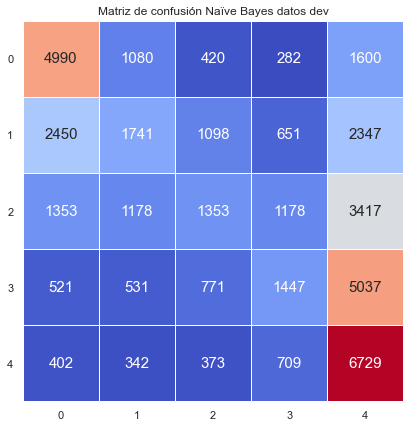

In [98]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Naïve Bayes datos dev")
plt.yticks(rotation=0)
plt.show()

In [99]:
print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      8372
           2       0.30      0.28      0.29      8287
           3       0.29      0.28      0.29      8479
           4       0.31      0.33      0.32      8307
           5       0.43      0.43      0.43      8555

    accuracy                           0.37     42000
   macro avg       0.37      0.37      0.37     42000
weighted avg       0.37      0.37      0.37     42000



Podemos ver que con Naïve Bayes y con el árbol de decisión sencillo obtenemos los mismos resultados, por lo que no hay mucha diferencia entre un modelo y otro.

Vamos a seguir probando con diferentes modelos:

## Modelo con Random Forest

In [100]:
#Importamos librerías:
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Instanceamos primera prueba con los datos por de fault
rf = RandomForestClassifier(random_state=42)

In [102]:
#Entrenamos el modelo:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
#Predecimos los valores para train:
y_pred_train_rf= rf.predict(X_train)

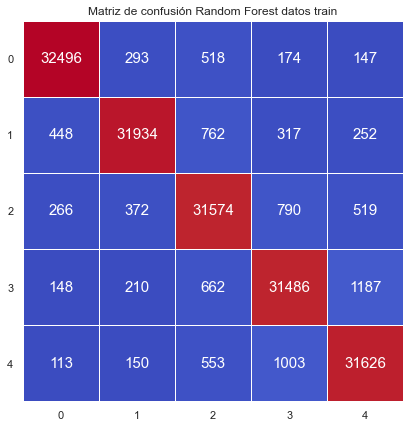

In [104]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_train, y_pred_train_rf), square = True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5, cbar=False)
plt.title ("Matriz de confusión Random Forest datos train")
plt.yticks(rotation=0)
plt.show()

In [105]:
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     33628
           2       0.97      0.95      0.96     33713
           3       0.93      0.94      0.93     33521
           4       0.93      0.93      0.93     33693
           5       0.94      0.95      0.94     33445

    accuracy                           0.95    168000
   macro avg       0.95      0.95      0.95    168000
weighted avg       0.95      0.95      0.95    168000



In [106]:
#Vamos a predecir los datos para dev
y_pred_test_rf = rf.predict(X_test)

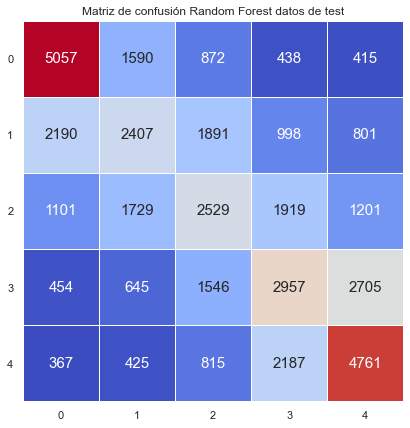

In [107]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Random Forest datos de test")
plt.yticks(rotation=0)
plt.show()

In [108]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           1       0.55      0.60      0.58      8372
           2       0.35      0.29      0.32      8287
           3       0.33      0.30      0.31      8479
           4       0.35      0.36      0.35      8307
           5       0.48      0.56      0.52      8555

    accuracy                           0.42     42000
   macro avg       0.41      0.42      0.42     42000
weighted avg       0.41      0.42      0.42     42000



Podemos ver que es el mejor modelo obtenido.

## Transformación a un modelo binario

También podemos ver que los mejores escore de F1 en los diferentes modelos que probamos son los de 1 estrella y 5 estrellas, por lo que convendría transformar los datos de 5 estrellas a reseñas positivas y negativas.

Para esto tomaremos las calificaciones de 1, 2 y 3 estrellas como calificación **negativa** y 4 y 5 estrellas como calificación **positiva** y probaremos de nuevo los modelos con estos datos para ver si hay mejora en el score.


In [109]:
data.head()

stars                                        review_body
0      1  bueno pantalla menos meses recibido respuesta ...
1      1  horrible comprar sabemos inglés informático de...
2      1  obligan comprar unidades llega forma reclamar ...
3      1  entro descalificar vendedor puedo decir tras m...
4      1                       llega tarde talla equivocada

In [110]:
data.shape

(210000, 2)

In [111]:
#Agregamos una columna al datset donde si tiene 1,2 o 3 estrellas ponga 0 y si tiene 4 o 5 estrellas ponga 1
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}
data["sentiment"]= data["stars"].map(x)
data.head()

stars                                        review_body  sentiment
0      1  bueno pantalla menos meses recibido respuesta ...          0
1      1  horrible comprar sabemos inglés informático de...          0
2      1  obligan comprar unidades llega forma reclamar ...          0
3      1  entro descalificar vendedor puedo decir tras m...          0
4      1                       llega tarde talla equivocada          0

<AxesSubplot:xlabel='sentiment', ylabel='count'>

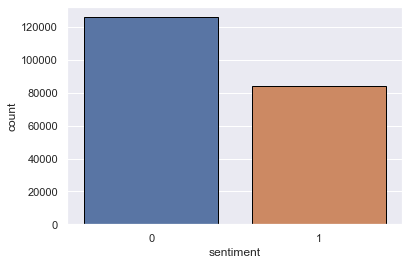

In [112]:
#Para ver cómo quedó distribuido el dataset 
sns.countplot(data= data, x="sentiment", lw=1, edgecolor="black")

Podemos ver que no está tan desbalanceado el dataset.

Vamos a hacer la separación de los valores para train y test:

In [113]:
#Asignamos los valores de y2 a la columna sentimiento y X2 lo dejamos con lo que tenía X
y2= list(data.sentiment.values)
X2= X

In [114]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [115]:
#Validamos que haya quedado bien hecha la participación 
print (X2_train.shape, len(y2_train))
print (X2_test.shape, len(y2_test))

(168000, 1000) 168000
(42000, 1000) 42000


### Probando los mejores modelos con los nuevos datos de `y`  ( en binario).

Ya que lo que nos interesa es mejorar el score para `test` (que son nuestras predicciones), en esta parte no haremos predicciones para los datos de train, sólo para los datos de dev.

### Naïve Bayes:

In [116]:
nb2= GaussianNB()

In [117]:
#Entrenamos el modelo:
nb2.fit(X2_train.toarray(), y2_train)

GaussianNB()

In [118]:
#Predecimos para test:
y2_pred_test_nb= nb2.predict(X_test.toarray())

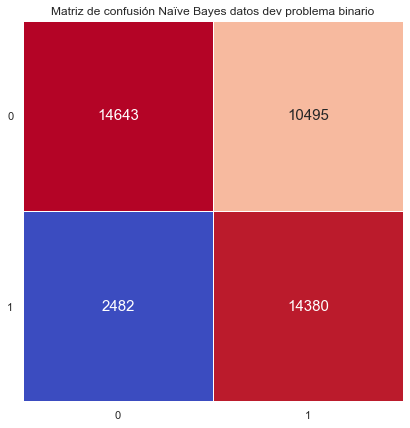

In [119]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y2_test, y2_pred_test_nb), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Naïve Bayes datos dev problema binario")
plt.yticks(rotation=0)
plt.show()

In [120]:
print(classification_report(y2_test, y2_pred_test_nb))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69     25138
           1       0.58      0.85      0.69     16862

    accuracy                           0.69     42000
   macro avg       0.72      0.72      0.69     42000
weighted avg       0.74      0.69      0.69     42000



Vamos que hubo buena mejora en el accuracy y el F1 score cuando hacemos un problema binario.

Probemos con el Random Forest, que fue el mejor modelo anterior.

### Random Forest

In [121]:
rf2=RandomForestClassifier(random_state=42)

In [122]:
#Entrenamos el modelo:
rf2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [123]:
y2_pred_test_rf = rf2.predict(X2_test)

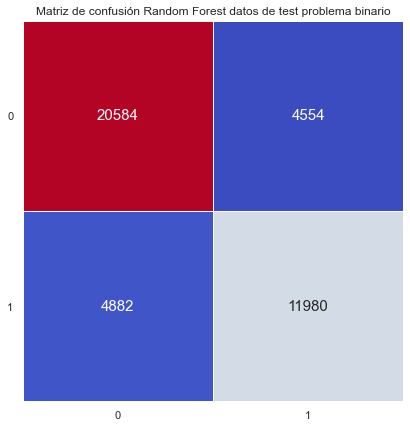

In [124]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y2_test, y2_pred_test_rf), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Random Forest datos de test problema binario")
plt.yticks(rotation=0)
plt.show()

In [125]:
print(classification_report(y2_test, y2_pred_test_rf))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     25138
           1       0.72      0.71      0.72     16862

    accuracy                           0.78     42000
   macro avg       0.77      0.76      0.77     42000
weighted avg       0.77      0.78      0.77     42000



Podemos ver que el modelo de `Random Forest` ha dado mucho mejores resultados que el modelo anterior.

Ya que es un problema con 2 variables podemos hacer una **Regresión Logística** para ver si mejora el score.

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
#Instanciamos el modelo:
lr= LogisticRegression()

In [128]:
#Entrenamos el modelo
lr.fit(X2_train, y2_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
y2_pred_test_lr= lr.predict(X2_test)

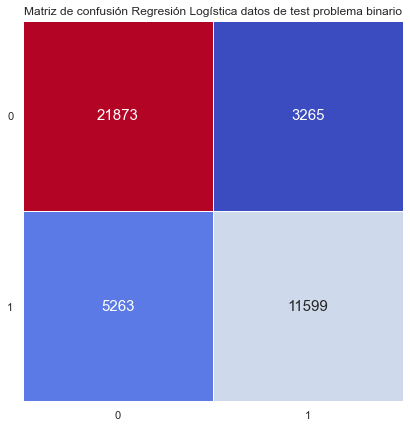

In [130]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y2_test, y2_pred_test_lr), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Regresión Logística datos de test problema binario")
plt.yticks(rotation=0)
plt.show()

In [131]:
print(classification_report(y2_test, y2_pred_test_lr))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     25138
           1       0.78      0.69      0.73     16862

    accuracy                           0.80     42000
   macro avg       0.79      0.78      0.78     42000
weighted avg       0.80      0.80      0.79     42000



Vemos que mejoró el resultado con Regresión Logística.

También podemos probar con Linear Support Vector Classification.

### Linear Support Vector Classification

In [132]:
from sklearn.svm import LinearSVC

In [133]:
#Instanceamos:
svc= LinearSVC()

In [134]:
#Entrenamos el modelo:
svc.fit(X2_train, y2_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [135]:
#Predecimos para los valores de dev:
y2_pred_test_svc= svc.predict(X2_test)

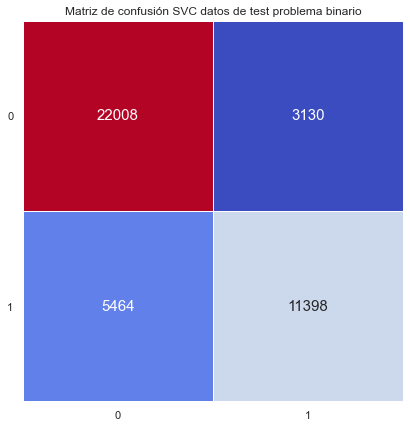

In [136]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y2_test, y2_pred_test_svc), cbar = False,  square = True, annot=True,fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión SVC datos de test problema binario")
plt.yticks(rotation=0)
plt.show()

In [137]:
print(classification_report(y2_test, y2_pred_test_svc))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     25138
           1       0.78      0.68      0.73     16862

    accuracy                           0.80     42000
   macro avg       0.79      0.78      0.78     42000
weighted avg       0.79      0.80      0.79     42000



## Conclusiones 1:

Podemos ver que los modelos mejoraron cuando pasamos de un problema multivariable (predecir entre 5 estrellas) a bivariable (predecir entre dar comentarios positivos o negativos). Por lo que nos quedamos con el **bivariable**

Vemos que los modelos de **Logistic Regression** y **SVC** dan buenos resultados y son modelos muy sencillos (no consumen muchos recursos y son rápidos), sin embargo ingresar una matriz de 1,000 palabras es mucho para ellos y puden fallar (los mismos modelos recomiendan aplicar técnicas de estandarización de datos), por lo que al final representaría más procesos y trabajo quizás con resultados bajos.

El modelo con **Random Forest** tiene un muy buen desempeño, un poco por debajo de los modelos anteriores y consume más recursos, sin embrago podemos ingresar la matriz de 1000 datos sin problemas ni tener que hacer algún trabajo extra. Por lo que se considera **mejor opción** para este caso.

# Parte C

### Próximos pasos y Resultados esperados:

Dado que el problema es acerca de las reseñas o comenatrios que la gente escribe sobre un producto, se podría revisar la opción de utilizar solamente **Adjetivos Calificativos** para realizar el análisis (formar la matriz con los adjetivos que aparecen en las reseñas), ya que los adjetivos son palabras que sirven para "calificar" o denotar las cualidades o atributos de los objetos que acompañan. 

Esto también podría resultar dn mejoras en el desempeño del modelo, ya que que la matriz de adjetivos sería mucho más pequeña que la que se utiliza en este ejercicio. Parte de esas mejoras sería utilizar modelos sencillos como SVC o Regresión Logística que sean buenos clasificadores y predictores y mucho más rápidos que el Random Forest utilizado en este ejercicio.

Actualmente hay otros modelos como BERT de Google que de igual forma podría resultar en interesante probar para este proyecto, ya que promete mucho en NLP.

---


# Informe Final de Carrera.

### Resumen del proyecto
Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

La realización y entrega del Proyecto es individual.

### Entregables
Un Notebook de Jupyter con la resolución de la consigna. El Notebook debe poder ejecutarse sin errores. En el notebook debe estar el link al repositorio (por ejemplo, de GitHub) donde se pueda encontrar el proyecto entregado y todo los materiales necesarios.

### Referencias
Apóyate en las bitácoras, los notebooks trabajados y las presentaciones vistas en clase para resolver tu proyecto. También será de mucha utilidad la documentación de las librerías de Python. No dudes en consultar comunidades online como Stack Overflow y, por supuesto, buscar en la web (googlear).

### Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

1. Elige tu punto de partida entre dos opciones:
    - Tus Proyectos 01 y 02
    - Tu Proyecto 03
    
Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

2. Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

3. Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

4. Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

5. Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.

6. Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

### Checklist de evaluación
- Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.
- Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.
- Las preguntas que se respondan deben estar correctamente explicitadas.
- Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
- Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.
- Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.
- Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

## Proyecto 4: Informe Final de Carrera.

Para este caso voy a darle continuidad al proyecto 3. Voy a utilizar **spaCy** una librería de NLP que tiene diccionario en español y se puede utilizar para hacer el preprocesamiento de los datos y ver si con ello mejora la predicción de los modelos.

### Preparación del dataset

Vamos a utilizar `data2` para hacer todo el procesamiento de los datos.

También vamos a realizar el preprocesamiento para los datos binarios (sentimiento positivo/negatico) ya que vimos que fue el que tuvo mejor resultado de clasificación.

In [138]:
data2.head()

stars                                        review_body  sentiment
0      1  bueno pantalla menos meses recibido respuesta ...          0
1      1  horrible comprar sabemos inglés informático de...          0
2      1  obligan comprar unidades llega forma reclamar ...          0
3      1  entro descalificar vendedor puedo decir tras m...          0
4      1                       llega tarde talla equivocada          0

Pasamos a modelo binario: de clasificación con 5 estrellas a sentimiento positivo o negativo. 

Vamos a tomar 1, 2 y 3 estrellas como sentimiento **negativo** y 4 y 5 estrellas como sentimiento **positivo** (igual que con el modelo anterior).

In [139]:
#Agregamos una columna al datset donde si tiene 1,2 o 3 estrellas ponga 0 y si tiene 4 o 5 estrellas ponga 1
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}
data2["sentiment"]= data2["stars"].map(x)
data2.head()

stars                                        review_body  sentiment
0      1  bueno pantalla menos meses recibido respuesta ...          0
1      1  horrible comprar sabemos inglés informático de...          0
2      1  obligan comprar unidades llega forma reclamar ...          0
3      1  entro descalificar vendedor puedo decir tras m...          0
4      1                       llega tarde talla equivocada          0

In [140]:
data.shape

(210000, 3)

Quitamos la columna `stars` ya que no es de utilidad.

In [141]:
data2.drop("stars", axis=1, inplace=True)

In [142]:
data2.head()

review_body  sentiment
0  bueno pantalla menos meses recibido respuesta ...          0
1  horrible comprar sabemos inglés informático de...          0
2  obligan comprar unidades llega forma reclamar ...          0
3  entro descalificar vendedor puedo decir tras m...          0
4                       llega tarde talla equivocada          0

### spaCy

Importamos librerías

In [143]:
import spacy
from spacy import displacy

In [144]:
#Instalamos el corpus (en caso de que no esté instalado)
#!python3 -m spacy download es
#!python3 -m spacy download es_core_news_md

#Cargamos el corpus en español:
nlp= spacy.load("es_core_news_md")

In [145]:
#Cargamos las stopwords
from spacy.lang.es.stop_words import STOP_WORDS

In [146]:
#Para visualizar las stopwords:
stopwords_spacy= list(STOP_WORDS)
print (stopwords_spacy)
print("spaCy tiene un total de ",len(stopwords_spacy), " stopwords")

['al', 'consigue', 'aquélla', 'haya', 'estaba', 'informó', 'siendo', 'seis', 'empleo', 'tendrá', 'cuánta', 'contra', 'despacio', 'fin', 'ésos', 'sabe', 'cuánto', 'dias', 'podrias', 'llevar', 'sola', 'mis', 'cuáles', 'dijo', 'anterior', 'general', 'asi', 'algunos', 'del', 'tuvo', 'eramos', 'siempre', 'aquello', 'solos', 'trabajan', 'empleas', 'dia', 'míos', 'habrá', 'creo', 'ahí', 'pueden', 'misma', 'nadie', 'esos', 'aquí', 'próximos', 'lejos', 'intentas', 'podriamos', 'trata', 'mismo', 'donde', 'cuatro', 'empleais', 'mientras', 'pronto', 'por', 'trabajas', 'en', 'el', 'embargo', 'mucha', 'aquel', 'vuestras', 'más', 'vais', 'enseguida', 'lleva', 'ningunos', 'ultimo', 'intento', 'dice', 'adelante', 'repente', 'parece', 'cuanta', 'ello', 'ellas', 'alrededor', 'habia', 'indicó', 'van', 'ése', 'emplean', 'ninguna', 'explicó', 'usar', 'solas', 'ningunas', 'sólo', 'encuentra', 'quiza', 'estar', 'sabemos', 'dio', 'conseguir', 'mismos', 'nuestros', 'ese', 'podemos', 'última', 'como', 'las', 'ex

## 1. Limpieza de datos (spaCy)

Vamos a hacer la limpieza de datos con spaCy para ver el desempeño.

También vamos a quitar las palabras que teníamos en filtrar ya que no aportan mucho al análisis.

In [147]:
filtrar

['producto', 'calidad', 'precio', 'si', 'dos', 'solo']

In [148]:
#Hacemos la función para limpiar las frases, ahora utilizando la librería spaCy

texto_list2=[]
for texto in data2.review_body:
    
    #Vamos a reemplzar los caracteres que no sean letras por espacios
    texto = re.sub("[^a-zA-ZáéíóúüÁÉÍÓÚÜñÑ]"," ",str(texto))

    #Pasamos todo a minúsculas
    texto = texto.lower()

    #Tokenizamos para separar las palabras
    texto = nlp(texto)

    #Sacamos las Stopwords, palabras filtradas y palabras menores a 3 caracteres:
    texto = [palabra.text for palabra in texto if not palabra.text in stopwords_spacy]
    texto = [palabra for palabra in texto if palabra not in filtrar]
    texto = [palabra for palabra in texto if len(palabra) >3]

    #Por ultimo volvemos a unir el titular
    texto=" ".join(texto)

    texto_list2.append(texto)
    

In [149]:
#Sustituimos la columna review_body por la columna limpia:
data2["review_body"]= texto_list2
data2.head()

review_body  sentiment
0       pantalla meses recibido respuesta fabricante          0
1  horrible comprar inglés informático hora capaz...          0
2  obligan comprar unidades llega forma reclamar ...          0
3  entro descalificar vendedor meses espera sigo ...          0
4                             llega talla equivocada          0

In [150]:
#Hacemos lista de los reviews y de las estrellas:
review_body_list2= list(data2.review_body.values)
sentiment_list2= list(data2.sentiment.values)

In [151]:
#Instanceamos el vectorizer
vectorizer = CountVectorizer(max_features= 1000)

In [152]:
matriz_review_body2= vectorizer.fit_transform(review_body_list2)

In [153]:
matriz_review_body2.shape

(210000, 1000)

In [154]:
#Definimos X, y
X3= matriz_review_body2
y3= sentiment_list2

In [155]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [156]:
#Validamos que haya quedado bien hecha la participación 
print (X3_train.shape, len(y3_train))
print (X3_test.shape, len(y3_test))

(168000, 1000) 168000
(42000, 1000) 42000


## Aplicamos los modelos

Vamos a utilizar los mismos modelos para validar si mejora los datos con spaCy.

Sólo vamos a predecir para test, ya que es lo que nos interesa y vamos a utilizar la matriz de confusión y el reporte de clasificación.

Vamos a evaluar el modelo con la función de pérdida **log_loss** para validar que el modelo elegido, ademasde tener un accuracy alto tenga también la función de pérdida menor.

### Decision Tree (Benchmark)

In [157]:
from sklearn.metrics import log_loss

In [158]:
#Instanceamos el modelo
tree3 = DecisionTreeClassifier (random_state=42)

In [159]:
#Entrenamos con datos de train
tree3.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=42)

In [160]:
#Predecimos para test
y3_test_pred_tree= tree3.predict(X3_test)

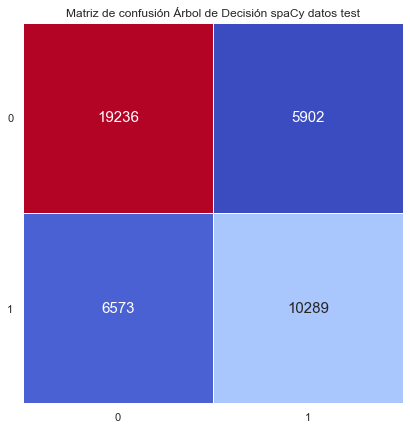

In [161]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y3_test, y3_test_pred_tree), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Árbol de Decisión spaCy datos test")
plt.yticks(rotation=0)
plt.show()

In [162]:
print(classification_report(y3_test, y3_test_pred_tree))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     25138
           1       0.64      0.61      0.62     16862

    accuracy                           0.70     42000
   macro avg       0.69      0.69      0.69     42000
weighted avg       0.70      0.70      0.70     42000



In [163]:
y_prob_tree= tree3.predict_proba(X3_test)

In [164]:
loss_tree= log_loss(y3_test, y_prob_tree)

In [195]:
loss_tree

6.978250198660682

Podemos ver que hay una Pequeña mejora con el modelo de árbol. Vamos a probar con los modelos Random Forest, Naïbe Bayes y Logistic Regresion

### Random Forest

In [165]:
#Instanceamos el modelo:
rf3= RandomForestClassifier(random_state=42)

In [166]:
#Entrenamos con los datos de train
rf3.fit(X3_train, y3_train)

RandomForestClassifier(random_state=42)

In [167]:
#Predecimos para los datos de test
y3_test_pred_rf = rf3.predict(X3_test)

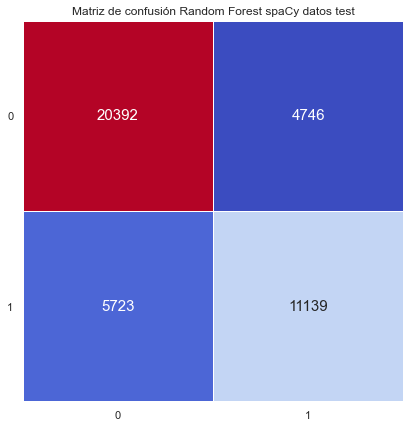

In [168]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y3_test, y3_test_pred_rf), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Random Forest spaCy datos test")
plt.yticks(rotation=0)
plt.show()

In [169]:
print(classification_report(y3_test, y3_test_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     25138
           1       0.70      0.66      0.68     16862

    accuracy                           0.75     42000
   macro avg       0.74      0.74      0.74     42000
weighted avg       0.75      0.75      0.75     42000



In [170]:
y_prob_rf3= rf3.predict_proba(X3_test)

In [171]:
loss_rf3= log_loss(y3_test, y_prob_rf3)

In [196]:
loss_rf3

0.588456611577658

#### Aumentando el número de árboles del bosque

In [172]:
#Instanceamos el modelo
rf4 = RandomForestClassifier(random_state=42, n_estimators= 500)

In [173]:
#Entrenamos con los datos de train
rf4.fit(X3_train, y3_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [174]:
#Predecimos para los datos de test
y3b_test_pred_rf = rf4.predict(X3_test)

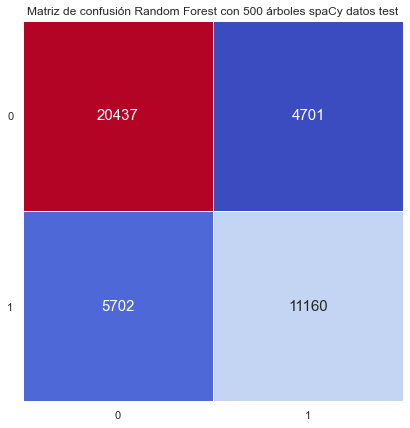

In [175]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y3_test, y3b_test_pred_rf), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Random Forest con 500 árboles spaCy datos test")
plt.yticks(rotation=0)
plt.show()

In [178]:
print(classification_report(y3_test, y3b_test_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     25138
           1       0.70      0.66      0.68     16862

    accuracy                           0.75     42000
   macro avg       0.74      0.74      0.74     42000
weighted avg       0.75      0.75      0.75     42000



In [176]:
y_prob_rf4= rf4.predict_proba(X3_test)

In [177]:
loss_rf4= log_loss(y3_test, y_prob_rf4)

In [197]:
loss_rf4

0.5521865357784977



### Naïbe Bayes

In [179]:
#Instanceamos el modelo:
nb3= GaussianNB()

In [180]:
#Entrenamos con los datos de train
nb3.fit(X3_train.toarray(), y3_train)

GaussianNB()

In [181]:
#Predecimos con los valores de test
y3_test_pred_nb = nb3.predict(X3_test.toarray())

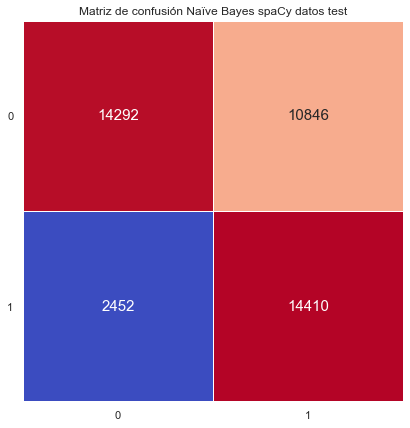

In [182]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y3_test, y3_test_pred_nb), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Naïve Bayes spaCy datos test")
plt.yticks(rotation=0)
plt.show()

In [183]:
print(classification_report(y3_test, y3_test_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68     25138
           1       0.57      0.85      0.68     16862

    accuracy                           0.68     42000
   macro avg       0.71      0.71      0.68     42000
weighted avg       0.74      0.68      0.68     42000



In [185]:
y_prob_nb3= nb3.predict_proba(X3_test.toarray())

In [187]:
loss_nb3= log_loss(y3_test, y_prob_nb3)
loss_nb3

10.29372043440428

## Logistic Regression

In [188]:
lr3= LogisticRegression(random_state=42)

In [189]:
lr3.fit(X3_train, y3_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [190]:
y3_test_pred_lr = lr3.predict(X3_test)

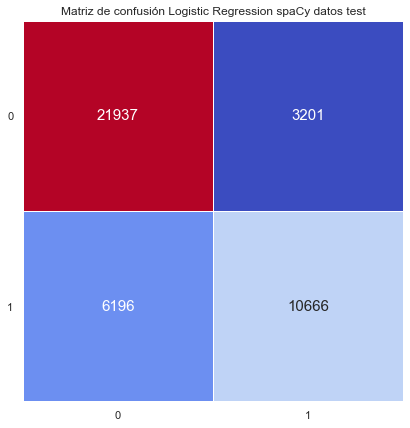

In [191]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y3_test, y3_test_pred_lr), cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5)
plt.title ("Matriz de confusión Logistic Regression spaCy datos test")
plt.yticks(rotation=0)
plt.show()

In [192]:
print(classification_report(y3_test, y3_test_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     25138
           1       0.77      0.63      0.69     16862

    accuracy                           0.78     42000
   macro avg       0.77      0.75      0.76     42000
weighted avg       0.78      0.78      0.77     42000



In [193]:
y_prob_lr3= lr3.predict_proba(X3_test)

In [194]:
loss_lr3= log_loss(y3_test, y_prob_lr3)

In [198]:
loss_lr3

0.4667714125148255

# Conclusiones

Podemos ver que al utilizar spaCy no mejoró mucho el modelo con respecto a utilizar NLTK, por lo que podemos utilizar cualquiera de las dos Librerías y nos quedamos con la **Regresión Logística** como modelo predictor, ya que da muy buen accuracy y tiene la menor función de pérdida asignada.

La ganancia de haber utilizado spaCy es el conocimiento de la librería y el uso para stopwords, ya que tiene mayor cantidad de stopwords.

Con los datos que tenemos podemos utilizar spaCy para el preprocesamiento y la Regresión Logística para el modelado.